<div style="background-color:maroon; padding:10px;">
</div>

# AM 205 - Advanced Scientific Computing: Numerical Methods
<div style="background-color:maroon; padding:10px;">
</div>

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Prof. Nick Trefethen<br/>
**Author**: Elaine Swanson

### 1. **p7.m** 
#### This script demonstrates a classic example of least-squares fitting for two instances, which is a fundamental method for data fitting and regression analysis, by minimizing the lst-sqrs error. It’s useful in cases where we have noisy data, and we want to find the best-fitting curve to minimize the error.
- Symmetric matrices have many special properties (e.g., their eigenvalues are always real), which can provide insights into the numerical stability and behavior of the least-squares problem, as we demonstrate with a heat map
- rcond=None: This is a cutoff for small singular values in the matrix A. If singular values of A are smaller than this threshold, they are treated as zero to improve numerical stability. Setting rcond=None uses the default machine precision cutoff based on the matrix size.
- The lstsq function returns four outputs: the solution vector x, the residuals, the rank of the matrix A, and the singular values of A. By indexing the first element, we are extracting only the solution vector 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

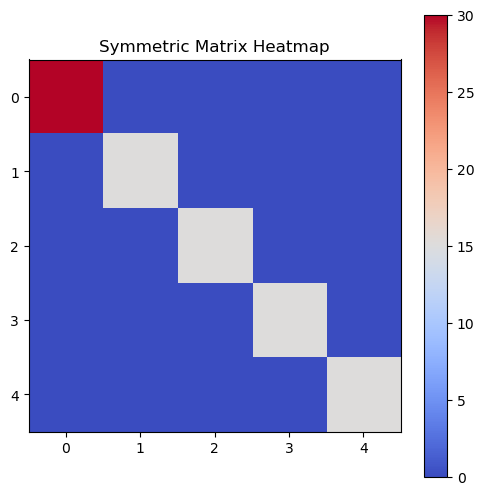

In [14]:
## define a time vector
t = 2 * np.pi * (np.arange(1, 31) / 30)

## create matrix A with trigonometric terms
A = np.column_stack([np.cos(0 * t), np.sin(t), np.cos(t), np.sin(2 * t), np.cos(2 * t)])

## compute A transpose * A 
AtA = np.dot(A.T, A)
plt.figure(figsize=(6, 6))
plt.imshow(AtA, cmap='coolwarm', interpolation='none')
plt.colorbar() 
plt.title('Symmetric Matrix Heatmap')
plt.show()

## define vector b with piecewise linear segments (np.linspace() lets you start at values that are greater than stop values)
b = np.concatenate([
    np.linspace(0, 3, 8),
    np.linspace(3, 2, 7),
    np.linspace(2, 6, 10),
    np.linspace(5, 0, 5)
])

## solve the least-squares problem: x = A\b and grab the solution
x = np.linalg.lstsq(A, b, rcond=None)[0]

## add a little noise
b_noisy = b + 0.5 * np.random.randn(30)

## solve again with noisy
x_noisy = np.linalg.lstsq(A, b_noisy, rcond=None)[0]

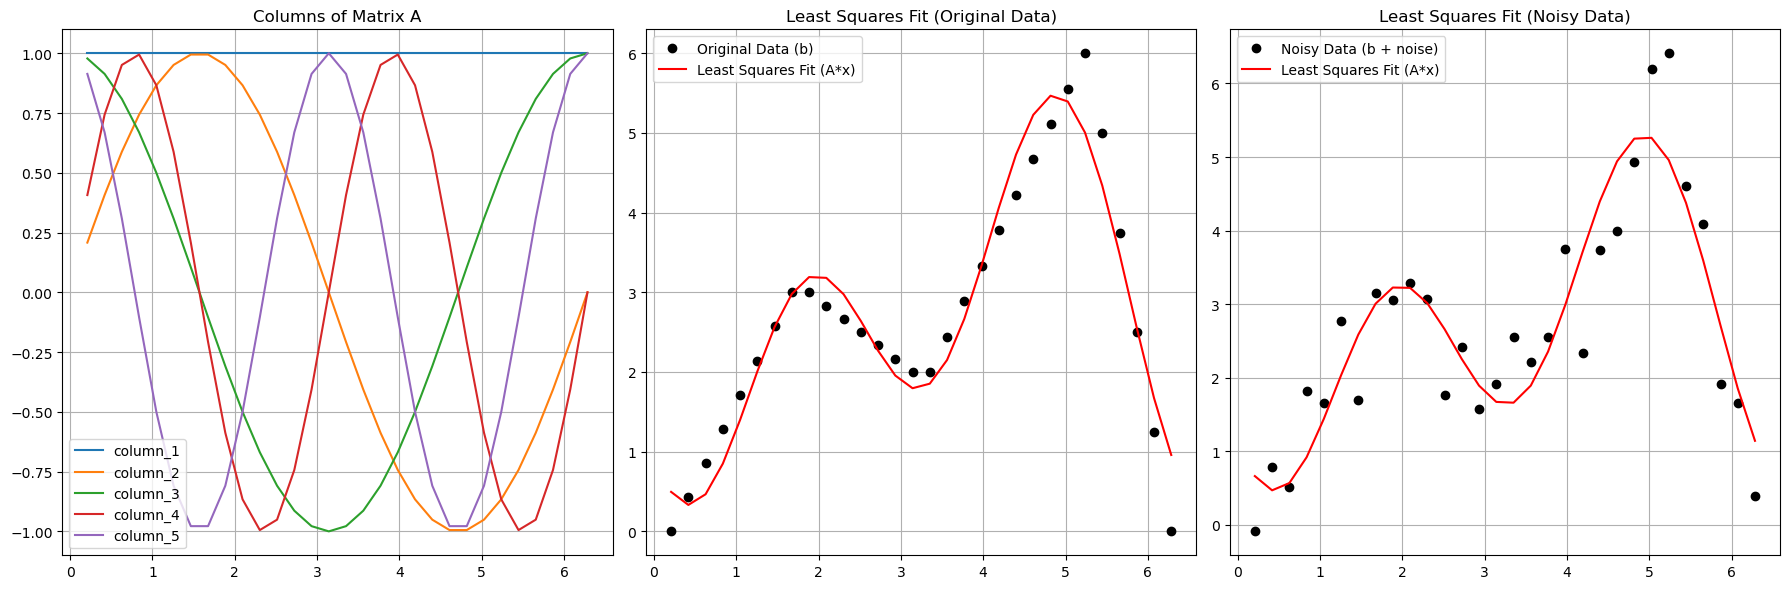

In [22]:
## show it
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

## labels for each column of matrix A
column_labels = [f'column_{i+1}' for i in range(A.shape[1])]

## oscillating columns of matrix A
for i in range(A.shape[1]):
    axs[0].plot(t, A[:, i], label=column_labels[i])  
axs[0].set_title('Columns of Matrix A')
axs[0].grid(True)
axs[0].legend()

## lst sqrs fit for original data
axs[1].plot(t, b, 'ok', label='Original Data (b)')
axs[1].plot(t, np.dot(A, x), 'r', label='Least Squares Fit (A*x)')
axs[1].set_title('Least Squares Fit (Original Data)')
axs[1].grid(True)
axs[1].legend()

## lst sqrs fit with noisy data
axs[2].plot(t, b_noisy, 'ok', label='Noisy Data (b + noise)')
axs[2].plot(t, np.dot(A, x_noisy), 'r', label='Least Squares Fit (A*x)')
axs[2].set_title('Least Squares Fit (Noisy Data)')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()